#### **Assumer un role (avec la librairie assumerole)**
Cette librairie est fournie par le support HPC dans le but d'intégrer l'utilisation des rôles dans des chaines de traitement ou programmes cnes.   
https://gitlab.cnes.fr/hpc/softs/assumerole   

Ici, elle est utilisée pour assumer un rôle sur l'account OT.

In [2]:
from assumerole import assumerole

credentials = assumerole.getCredentials('arn:aws:iam::732885638740:role/public-read-only-OT')

Session duration must be between 3600 and 43200 : 
	Duration : None -> 3600


#### **Lecture d'un produit S2-L2A en .zip avec s3fs**

On utilise s3fs pour récupérer le produit. Les produits étant compressés on utilise zipfile.    
On va travailler en mémoire exclusivement, c'est à dire sans avoir besoin de ramener le produit depuis le datalake vers un espace tampon

In [3]:
import s3fs
import os
import zipfile
from PIL import Image
import matplotlib.pyplot as plt

In [4]:
os.environ['AWS_ACCESS_KEY_ID']=credentials['AWS_ACCESS_KEY_ID']
os.environ['AWS_SECRET_ACCESS_KEY']=credentials['AWS_SECRET_ACCESS_KEY']
os.environ['AWS_SESSION_TOKEN']=credentials['AWS_SESSION_TOKEN']
os.environ['AWS_DEFAULT_REGION']="us-east-1"

## Block size of 100 MB = better performance
s3fs.S3FileSystem.default_block_size = 100*1024**2

# s3fs client setup
s3 = s3fs.S3FileSystem(client_kwargs={
        'endpoint_url': 'https://s3.datalake.cnes.fr'
        }
)

In [5]:
s3.ls('')

['flatsim',
 'hydroweb',
 'muscate',
 'postel',
 'sentinel1-grd',
 'sentinel1-ocn',
 'sentinel1-slc',
 'sentinel2-l1b',
 'sentinel2-l1c',
 'sentinel2-l2a-grs-hys2',
 'sentinel2-l2a-peps',
 'sentinel2-l2b-obs2co-hys2',
 'sentinel2-l2b-snow-hys2',
 'sentinel2-l2b-sw-single-hys2',
 'sentinel2-l3b-snow-hys2',
 'sentinel2-l3b-sw-monthly-hys2',
 'sentinel2-l3b-sw-yearly-hys2',
 'sentinel3-sral',
 'sentinel6-l1a',
 'swh-l1a',
 'take5']

#### Listing des fichiers

In [7]:
with s3.open('s3://sentinel2-l1c/60/N/TF/2020/01/11/S2A_MSIL1C_20200111T225451_N0500_R058_T60NTF_20230424T060012.zip', 'rb') as data:
    with zipfile.ZipFile(data) as z:
        for info in z.infolist():
            print(info.filename)

S2A_MSIL1C_20200111T225451_N0500_R058_T60NTF_20230424T060012.SAFE/
S2A_MSIL1C_20200111T225451_N0500_R058_T60NTF_20230424T060012.SAFE/DATASTRIP/
S2A_MSIL1C_20200111T225451_N0500_R058_T60NTF_20230424T060012.SAFE/DATASTRIP/DS_S2RP_20230424T060012_S20200111T225449/
S2A_MSIL1C_20200111T225451_N0500_R058_T60NTF_20230424T060012.SAFE/DATASTRIP/DS_S2RP_20230424T060012_S20200111T225449/QI_DATA/
S2A_MSIL1C_20200111T225451_N0500_R058_T60NTF_20230424T060012.SAFE/DATASTRIP/DS_S2RP_20230424T060012_S20200111T225449/QI_DATA/RADIOMETRIC_QUALITY.xml
S2A_MSIL1C_20200111T225451_N0500_R058_T60NTF_20230424T060012.SAFE/DATASTRIP/DS_S2RP_20230424T060012_S20200111T225449/QI_DATA/FORMAT_CORRECTNESS.xml
S2A_MSIL1C_20200111T225451_N0500_R058_T60NTF_20230424T060012.SAFE/DATASTRIP/DS_S2RP_20230424T060012_S20200111T225449/QI_DATA/GEOMETRIC_QUALITY.xml
S2A_MSIL1C_20200111T225451_N0500_R058_T60NTF_20230424T060012.SAFE/DATASTRIP/DS_S2RP_20230424T060012_S20200111T225449/QI_DATA/SENSOR_QUALITY.xml
S2A_MSIL1C_20200111T2254

#### Lecture de metadonnées

In [9]:
metadata=list()

with s3.open('s3://sentinel2-l1c/60/N/TF/2020/01/11/S2A_MSIL1C_20200111T225451_N0500_R058_T60NTF_20230424T060012.zip', 'rb') as data:
    with zipfile.ZipFile(data) as z:
        with z.open('S2A_MSIL1C_20200111T225451_N0500_R058_T60NTF_20230424T060012.SAFE/GRANULE/L1C_T60NTF_A023793_20200111T225449/MTD_TL.xml') as file_like_data:
            for line in file_like_data.readlines():
                metadata.append(line.rstrip().decode("utf-8"))
                
for line in metadata:
    print(line)

<?xml version="1.0" encoding="UTF-8" standalone="no"?>
<n1:Level-1C_Tile_ID xmlns:n1="https://psd-14.sentinel2.eo.esa.int/PSD/S2_PDI_Level-1C_Tile_Metadata.xsd" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:schemaLocation="https://psd-14.sentinel2.eo.esa.int/PSD/S2_PDI_Level-1C_Tile_Metadata.xsd /dpc/app/s2ipf/FORMAT_METADATA_TILE_L1C/06.01.00/scripts/../../../schemas/14.08.02/PSD/S2_PDI_Level-1C_Tile_Metadata.xsd">

  <n1:General_Info>
    <TILE_ID metadataLevel="Brief">S2A_OPER_MSI_L1C_TL_S2RP_20230424T060012_A023793_T60NTF_N05.00</TILE_ID>
    <DATASTRIP_ID metadataLevel="Standard">S2A_OPER_MSI_L1C_DS_S2RP_20230424T060012_S20200111T225449_N05.00</DATASTRIP_ID>
    <DOWNLINK_PRIORITY metadataLevel="Standard">NOMINAL</DOWNLINK_PRIORITY>
    <SENSING_TIME metadataLevel="Standard">2020-01-11T22:55:56.160551Z</SENSING_TIME>
    <Archiving_Info metadataLevel="Expertise">
      <ARCHIVING_CENTRE>S2RP</ARCHIVING_CENTRE>
      <ARCHIVING_TIME>2023-04-24T07:31:39.675311Z</ARCHIVIN

#### Lecture d'une image

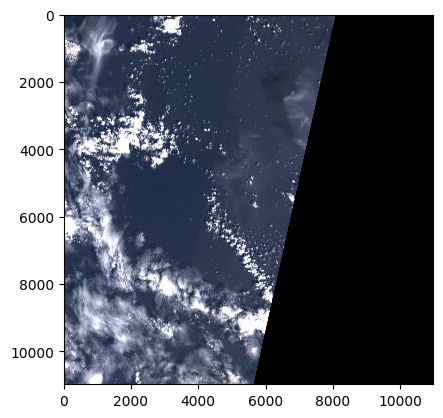

In [19]:
Image.MAX_IMAGE_PIXELS = None

with s3.open('s3://sentinel2-l1c/60/N/TF/2020/01/11/S2A_MSIL1C_20200111T225451_N0500_R058_T60NTF_20230424T060012.zip', 'rb') as data:
    with zipfile.ZipFile(data) as z:
        with z.open('S2A_MSIL1C_20200111T225451_N0500_R058_T60NTF_20230424T060012.SAFE/GRANULE/L1C_T60NTF_A023793_20200111T225449/IMG_DATA/T60NTF_20200111T225451_TCI.jp2') as file_like_image:
            img = Image.open(file_like_image)
            plt.imshow(img)

#### **Lecture d'un produit S2-L2A en .zip avec GDAL**

On utilise s3fs pour récupérer le produit. Les produits étant compressés on utilise zipfile.    
On va travailler en mémoire exclusivement, c'est à dire sans avoir besoin de ramener le produit depuis le datalake vers un espace tampon

In [7]:
from osgeo import gdal

config_options = {'AWS_S3_ENDPOINT': 's3.datalake.cnes.fr',
                  'AWS_VIRTUAL_HOSTING': 'FALSE',
                  'GDAL_HTTP_UNSAFESSL': 'YES'}

# GDAL va également récupérer les credentials qu'on a passé en variable d'environnement au début du notebook

for key, value in config_options.items():
    gdal.SetConfigOption(key, value)

#### Listing des fichiers

In [8]:
path='/vsizip/vsis3/sentinel2-l1c/60/N/TF/2020/01/11/S2A_MSIL1C_20200111T225451_N0500_R058_T60NTF_20230424T060012.zip'
ds = gdal.OpenDir(path)
dir_entry = gdal.GetNextDirEntry(ds)

while dir_entry != None:
    print(dir_entry.name)
    dir_entry = gdal.GetNextDirEntry(ds)

S2A_MSIL1C_20200111T225451_N0500_R058_T60NTF_20230424T060012.SAFE
S2A_MSIL1C_20200111T225451_N0500_R058_T60NTF_20230424T060012.SAFE/DATASTRIP
S2A_MSIL1C_20200111T225451_N0500_R058_T60NTF_20230424T060012.SAFE/DATASTRIP/DS_S2RP_20230424T060012_S20200111T225449
S2A_MSIL1C_20200111T225451_N0500_R058_T60NTF_20230424T060012.SAFE/DATASTRIP/DS_S2RP_20230424T060012_S20200111T225449/QI_DATA
S2A_MSIL1C_20200111T225451_N0500_R058_T60NTF_20230424T060012.SAFE/DATASTRIP/DS_S2RP_20230424T060012_S20200111T225449/QI_DATA/RADIOMETRIC_QUALITY.xml
S2A_MSIL1C_20200111T225451_N0500_R058_T60NTF_20230424T060012.SAFE/DATASTRIP/DS_S2RP_20230424T060012_S20200111T225449/QI_DATA/FORMAT_CORRECTNESS.xml
S2A_MSIL1C_20200111T225451_N0500_R058_T60NTF_20230424T060012.SAFE/DATASTRIP/DS_S2RP_20230424T060012_S20200111T225449/QI_DATA/GEOMETRIC_QUALITY.xml
S2A_MSIL1C_20200111T225451_N0500_R058_T60NTF_20230424T060012.SAFE/DATASTRIP/DS_S2RP_20230424T060012_S20200111T225449/QI_DATA/SENSOR_QUALITY.xml
S2A_MSIL1C_20200111T225451_N

#### Lecture des métadonnées

In [14]:
info = gdal.Info(path, deserialize=True)
print(info) 

Driver: SENTINEL2/Sentinel 2
Files: /vsizip/vsis3/sentinel2-l1c/60/N/TF/2020/01/11/S2A_MSIL1C_20200111T225451_N0500_R058_T60NTF_20230424T060012.zip
Size is 512, 512
Metadata:
  CLOUD_COVERAGE_ASSESSMENT=18.3768312922673
  DATATAKE_1_DATATAKE_SENSING_START=2020-01-11T22:54:51.024Z
  DATATAKE_1_DATATAKE_TYPE=INS-NOBS
  DATATAKE_1_ID=GS2A_20200111T225451_023793_N05.00
  DATATAKE_1_SENSING_ORBIT_DIRECTION=DESCENDING
  DATATAKE_1_SENSING_ORBIT_NUMBER=58
  DATATAKE_1_SPACECRAFT_NAME=Sentinel-2A
  DEGRADED_ANC_DATA_PERCENTAGE=0.0
  DEGRADED_MSI_DATA_PERCENTAGE=0
  FOOTPRINT=POLYGON((175.02859922932942 0.904346142195177, 175.01084015934188 0.823713260276766, 174.9781000699309 0.675097230164691, 174.9453578126677 0.526439389675508, 174.91260639623997 0.377758936803373, 174.87980027983923 0.228976280944453, 174.84701555839715 0.080155307492822, 174.81428337246 -0.068662537070485, 174.80995207625952 -0.088414367929196, 174.30479405527342 -0.088384188930846, 174.3044638044747 0.903903730990171, 17

#### Lecture d'une image

In [17]:
path="/vsizip/vsis3/sentinel2-l1c/60/N/TF/2020/01/11/S2A_MSIL1C_20200111T225451_N0500_R058_T60NTF_20230424T060012.zip/S2A_MSIL1C_20200111T225451_N0500_R058_T60NTF_20230424T060012.SAFE/GRANULE/L1C_T60NTF_A023793_20200111T225449/IMG_DATA/T60NTF_20200111T225451_TCI.jp2"
ds = gdal.Open(path)
print(ds.RasterCount)

band = ds.GetRasterBand(1)
xoff, yoff, xcount, ycount = (0, 0, 1000, 1000)
np_array = band.ReadAsArray(xoff, yoff, xcount, ycount)

ERROR 1: PROJ: proj_create_from_database: Open of /softs/rh8/conda-envs/s3-env/share/proj failed


3


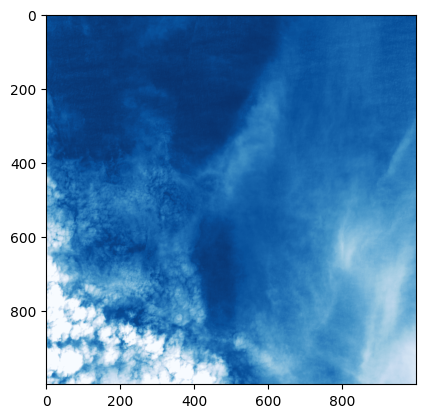

In [18]:
plt.imshow(np_array, cmap='Blues_r')